In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba

In [3]:
joke = jieba.cut('道士看见和尚亲吻了尼姑的嘴唇')
joke = [' '.join(joke)]
vect = CountVectorizer()
vect.fit(joke)
joke_feature = vect.transform(joke)
print('这句话的特征表达：\n{}'.format(joke_feature.toarray()))

这句话的特征表达：
[[1 1 1 1 1 1]]


In [4]:
joke2 = jieba.cut('尼姑看见道士的嘴唇亲吻了和尚')
joke2 = [' '.join(joke2)]
joke2_feature = vect.transform(joke2)
print('这句话的特征表达：\n{}'.format(joke2_feature.toarray()))

这句话的特征表达：
[[1 1 1 1 1 1]]


In [5]:
vect = CountVectorizer(ngram_range=(2,2))
cv = vect.fit(joke)
joke_feature = cv.transform(joke)
print('调整n-Gram参数后的词典：{}'.format(cv.get_feature_names()))
print('新的特征表达：{}'.format(joke_feature.toarray()))

调整n-Gram参数后的词典：['亲吻 尼姑', '和尚 亲吻', '尼姑 嘴唇', '看见 和尚', '道士 看见']
新的特征表达：[[1 1 1 1 1]]


D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
joke2 = jieba.cut('尼姑看见道士的嘴唇亲吻了和尚')
joke2 = [' '.join(joke2)]
joke2_feature = vect.transform(joke2)
print('这句话的特征表达：\n{}'.format(joke2_feature.toarray()))

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer().fit(joke)
print(tf.get_feature_names())

这句话的特征表达：
[[0 0 0 0 0]]
['亲吻', '和尚', '嘴唇', '尼姑', '看见', '道士']


# ACLIMDB数据集

In [136]:
#coding = <gbk>
path = 'D:/liuchaochao/桌面/aclImdb'
!tree D:\liuchaochao\桌面\aclImdb

卷 Data 的文件夹 PATH 列表
卷序列号为 00000051 F6FD:B891
D:\LIUCHAOCHAO\桌面\ACLIMDB
├─test
│  ├─neg
│  └─pos
└─train
    ├─neg
    ├─pos
    └─unsup


In [137]:
from sklearn.datasets import load_files
train_set = load_files('D:/liuchaochao/桌面/aclImdb/train')
X_train, y_train = train_set.data, train_set.target
print('训练集文件数量:{}'.format(len(X_train)))
print('\n随机抽一个看看:\n', X_train[22])

训练集文件数量:75000

随机抽一个看看:
 b"Okay, once you get past the fact that Mitchell and Petrillo are Dean and Jerry knockoffs, you could do worse than this film. Charlita as Princess Nona is great eye candy, Lugosi does his best with the material he's given, and the production values, music especially (except for the vocals) are better than you'd think for the $50k cost of production. The final glimpses of the characters are a hoot. Written by Tim Ryan, a minor actor in late Charlie Chan films, and husband of Grannie on the Beverly Hillbillies. All in all, WAY better than many late Lugosi cheapies."


In [138]:
X_train = [doc.replace(b'<br />', b' ') for doc in X_train]
test = load_files('D:/liuchaochao/桌面/aclImdb/test/')
X_test, y_test = test.data, test.target
X_test = [doc.replace(b'<br />', b' ') for doc in X_test]
len(X_test)

25000

In [139]:
vect = CountVectorizer().fit(X_train)
X_train_vect = vect.transform(X_train)
print('训练集样本特征数量：{}'.format(len(vect.get_feature_names())))
print('最后10个训练集样本特征：{}'.format(vect.get_feature_names()[-10:]))

训练集样本特征数量：124255
最后10个训练集样本特征：['üvegtigris', 'üwe', 'ÿou', 'ıslam', 'ōtomo', 'şey', 'дом', 'книги', '色戒', 'ｒｏｃｋ']


D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [142]:
X_train_vect.iloc

(75000, 124255)

In [37]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearSVC(), X_train_vect, y_train)
print('模型平均分：{:.3f}'.format(scores.mean()))

D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


模型平均分：0.671


D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
X_test_vect = vect.transform(X_test)
clf = LinearSVC().fit(X_train_vect, y_train)
print('测试集模型得分：{}'.format(clf.score(X_test_vect, y_test)))

测试集模型得分：0.25116


D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(smooth_idf = False)
tfidf.fit(X_train_vect)
X_train_tfidf = tfidf.transform(X_train_vect)
X_test_tfidf = tfidf.transform(X_test_vect)
print('未经tfidf处理的特征：\n',X_train_vect[:5,:5].toarray())
print('经过tfidf处理的特征：\n',X_train_tfidf[:5,:5].toarray())

未经tfidf处理的特征：
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
经过tfidf处理的特征：
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [40]:
clf = LinearSVC().fit(X_train_tfidf, y_train)
scores2 = cross_val_score(LinearSVC(), X_train_tfidf, y_train)

print('经过tf-idf处理的训练集交叉验证得分：{:.3f}'.format(scores.mean()))
print('经过tf-idf处理的测试集得分：{:.3f}'.format(clf.score(X_test_tfidf,
                                                y_test)))

经过tf-idf处理的训练集交叉验证得分：0.671
经过tf-idf处理的测试集得分：0.145


In [41]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('停用词个数：', len(ENGLISH_STOP_WORDS))
print('列出前20个和最后20个：\n', list(ENGLISH_STOP_WORDS)[:20],
     list(ENGLISH_STOP_WORDS)[-20:])

停用词个数： 318
列出前20个和最后20个：
 ['also', 'others', 'either', 'below', 'ever', 'three', 're', 'thick', 'too', 'how', 'no', 'always', 'sometimes', 'hence', 'system', 'down', 'when', 'name', 'get', 'he'] ['everywhere', 'whenever', 'sixty', 'any', 'because', 'were', 'except', 'cant', 'enough', 'than', 'without', 'they', 'third', 'fire', 'could', 'therein', 'you', 'detail', 'she', 'seems']


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(smooth_idf = False, stop_words = 'english')
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
scores3 = cross_val_score(LinearSVC(), X_train_tfidf, y_train)
clf.fit(X_train_tfidf, y_train)
X_test_tfidf = tfidf.transform(X_test)
print('去掉停用词后训练集交叉验证平均分：{:.3f}'.format(scores3.mean()))
print('去掉停用词后测试集模型得分：{:.3f}'.format(clf.score(X_test_tfidf, 
                                              y_test)))

去掉停用词后训练集交叉验证平均分：0.733
去掉停用词后测试集模型得分：0.152


In [ ]:



if __name__ == "__main__":
    # NOTE: we put the following in a 'if __name__ == "__main__"' protected
    # block to be able to use a multi-core grid search that also works under
    # Windows, see: http://docs.python.org/library/multiprocessing.html#windows
    # The multiprocessing module is used as the backend of joblib.Parallel
    # that is used when n_jobs != 1 in GridSearchCV

    # the training data folder must be passed as first argument
    movie_reviews_data_folder = sys.argv[1]
    dataset = load_files(movie_reviews_data_folder, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    # TASK: Build a vectorizer / classifier pipeline that filters out tokens
    # that are too rare or too frequent

    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters

    # TASK: print the cross-validated scores for the each parameters set
    # explored by the grid search

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)

    # import matplotlib.pyplot as plt
    # plt.matshow(cm)
    # plt.show()

# 代码的主要流程如下：

1.导入必要的库。

2.加载电影评论数据集。

3.将数据集分为训练集和测试集。

4.构建一个包含特征提取和分类器的管道。

5.使用网格搜索确定单个词（unigram）或两个词（bigram）哪个更有用。

6.在训练集上拟合管道，使用网格搜索寻找最佳参数。

7.打印每个候选参数的平均值和标准差。

8.在测试集上预测结果并保存在变量y_predicted中。

9.打印分类报告，包括精确率、召回率等指标。

10.打印和绘制混淆矩阵。

In [71]:
# 1.导入必要的库。
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier#KNN模型
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import jieba
import warnings
warnings.filterwarnings('ignore')

In [72]:
# 2.加载电影评论数据集。
dataset = load_files('D:/liuchaochao/桌面/txt_sentoken', shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [73]:
# 3.将数据集分为训练集和测试集。
x_train, x_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.3, random_state=None) 

In [74]:
# 3.1.将句子转为向量
print('训练集文件数量:{}'.format(len(x_train)))
#print('\n随机抽一个看看:\n', x_train[42])

x_train_r = [doc.replace(b"\n", b" ").replace(b"\''", b"") for doc in x_train]
x_test_r = [doc.replace(b"\n", b" ").replace(b"\''", b"") for doc in x_test]


训练集文件数量:1400


In [75]:
# 3.2.获得样本特征
vect = CountVectorizer().fit(x_train_r)
x_train_vect = vect.transform(x_train_r)
x_test_vect = vect.transform(x_test_r)
print('训练集样本特征数量：{}'.format(len(vect.get_feature_names())))
print('最后10个训练集样本特征：{}'.format(vect.get_feature_names()[56:66]))

训练集样本特征数量：34528
最后10个训练集样本特征：['14th', '15', '150', '1500s', '150th', '151', '152', '1521', '153', '155']


In [76]:
# 4.构建一个包含特征提取和分类器的管道。
pipeline = Pipeline(steps=[('select',SelectPercentile()),
                     ('knn',KNeighborsClassifier(n_jobs=-1))])

In [83]:
# 5.使用网格搜索确定单个词（unigram）或两个词（bigram）哪个更有用。
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
# scores = cross_val_score(LinearSVC(), x_train_vect, y_train)
# print('模型平均分：{:.3f}'.format(scores.mean()))
vect = CountVectorizer()
pl = Pipeline(steps=[('vec',vect),
                     ('knn',KNeighborsClassifier(n_jobs=-1))])

pss = {'vec__ngram_range':[(1,1),(2,2),(3,3)]}

ser = GridSearchCV(pl,pss, cv=5)
ser.fit(x_train,y_train)

# print('模型最高分：{:.f}'.format(ser.score(x_test, y_test)))
print('最优参数：{}'.format(ser.best_params_))


最优参数：{'vec__ngram_range': (1, 1)}


In [84]:
# 6.在训练集上拟合管道，使用网格搜索寻找最佳参数。
pipeline = Pipeline(steps=[('select',SelectPercentile()),
                     ('knn',KNeighborsClassifier(n_jobs=-1))])
param_grid = {'select__percentile':[30,40,50,60,70],
             'knn__n_neighbors':[3,10,20,50,70,100,200]}  
# pipeline.fit(x_train_vect,y_train)


clf = GridSearchCV(pipeline,param_grid, cv=5)
clf.fit(x_train_vect,y_train)

print(clf.best_score_)
print(clf.best_estimator_)

0.6607142857142857
Pipeline(steps=[('select', SelectPercentile(percentile=70)),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=50))])


In [85]:
# 7.打印每个候选参数的平均值和标准差。
print('select__percentile avg       \t{}'.format(np.mean(param_grid['select__percentile'])))
print('select__percentile std    \t {}'.format(np.std(param_grid['select__percentile'])))
print('knn__n_neighbors avg    \t {}'.format(np.mean(param_grid['knn__n_neighbors'])))
print('knn__n_neighbors std        \t{}'.format(np.std(param_grid['knn__n_neighbors'])))

select__percentile avg       	50.0
select__percentile std    	 14.142135623730951
knn__n_neighbors avg    	 64.71428571428571
knn__n_neighbors std        	63.912248514694596


In [86]:
# 8.在测试集上预测结果并保存在变量y_predicted中。
y_predicted = clf.predict(x_test_vect)

In [87]:
# 9.打印分类报告，包括精确率、召回率等指标。
print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

              precision    recall  f1-score   support

         neg       0.59      0.89      0.71       299
         pos       0.78      0.39      0.52       301

    accuracy                           0.64       600
   macro avg       0.69      0.64      0.61       600
weighted avg       0.69      0.64      0.61       600



[[266  33]
 [184 117]]


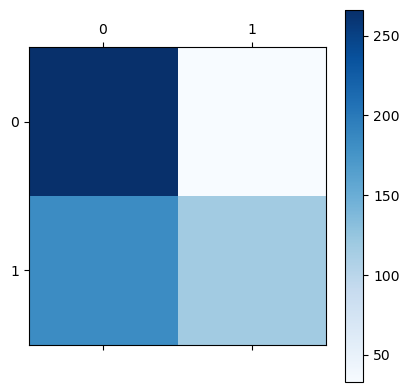

In [88]:
# 10.打印和绘制混淆矩阵。
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

plt.matshow(cm)
# plt.colorbar()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()